# Question 1 : varier le nombre d'epochs

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)


##########################################################################
#    Chargement/telechargement de la base de TRAIN de CIFARE10           #
##########################################################################

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

##########################################################################
#    Chargement/telechargement de la base de TEST de CIFARE10            #
##########################################################################

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

##########################################################################
#   Definition du module pour parcourir les donnees                      #
# Paramètres:                                                            #
#       - Batchsize (nb d'images qui passent en une fois avant retropropagation)#
#       - shuffle (ordre de passage aléatoire des images) :              #
#                   Vrai      ---> lors de l'entraînement                #
#                   Faux/Vrai ---> lors du test                          #
#                                                                        #
# * On va creer 2 modules : un pour le TRAIN et un pour le TEST          #
##########################################################################

trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=False, num_workers=2)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5)
        self.fc1 = nn.Linear(in_features=20 * 5 * 5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 20 * 5 * 5) #flattening
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().to(device)
print(net)

Net(
  (conv1): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=500, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [4]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [ ]:
###############################################
#   * Fixer les paramètres de l'entraînement   #
###############################################
  
nb_epoch = 50 # Le nombre d'epoch
loss_list = [] # liste qui va contenir la valeur du loss a chaque epoch
accuracy_list = []
for epoch in range(nb_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    nb_data = 0.
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        inputs, labels = inputs.to(device), labels.to(device)
        

        # forward + backward + optimize
        outputs = net(inputs)              # Forward
        loss = criterion(outputs, labels)
        loss.backward()                    # Backward
        optimizer.step()                   # optimize
 
        # print statistics
        running_loss += loss.item()
        
        nb_data += 1.
        
    running_loss = running_loss / nb_data
    loss_list.append(running_loss)  
    
    correct = 0.
    total = 0.
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy_list.append(correct / total)
    
    print("Epoch ", epoch, "; train loss = ", running_loss, "; accuracy = ", correct / total) 
    
torch.save({
                'nb_epoch': nb_epoch,
                'model' : net.state_dict(),
                'listLoss': loss_list,
            }, "modelNN.pth")

print('Finished Training and save the model as `modelNN.pth`')

Epoch  0 ; train loss =  1.6203198215293884 ; accuracy =  0.5195
Epoch  1 ; train loss =  1.3038117825126647 ; accuracy =  0.5517
Epoch  2 ; train loss =  1.1919381875133515 ; accuracy =  0.5461
Epoch  3 ; train loss =  1.1270770934200287 ; accuracy =  0.5876
Epoch  4 ; train loss =  1.0803391752910614 ; accuracy =  0.6026
Epoch  5 ; train loss =  1.04900923535347 ; accuracy =  0.5977
Epoch  6 ; train loss =  1.013974818239212 ; accuracy =  0.6107
Epoch  7 ; train loss =  1.007877198615074 ; accuracy =  0.6023
Epoch  8 ; train loss =  0.990158208656311 ; accuracy =  0.6193
Epoch  9 ; train loss =  0.9925819343805313 ; accuracy =  0.6201
Epoch  10 ; train loss =  0.9762645311975479 ; accuracy =  0.607
Epoch  11 ; train loss =  0.9720696322393417 ; accuracy =  0.6128
Epoch  12 ; train loss =  0.9657028494071961 ; accuracy =  0.6038
Epoch  13 ; train loss =  0.965400047249794 ; accuracy =  0.6138
Epoch  14 ; train loss =  0.9685617734909058 ; accuracy =  0.5973
Epoch  15 ; train loss =  0

In [5]:
import matplotlib.pyplot as plt
import numpy as np

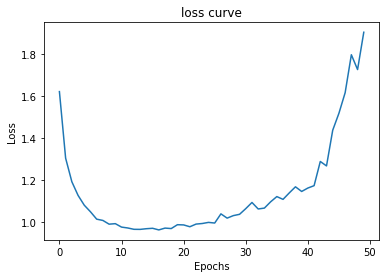

In [ ]:
plt.plot()
plt.plot(range(len(loss_list)), loss_list)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("loss curve")





plt.show()

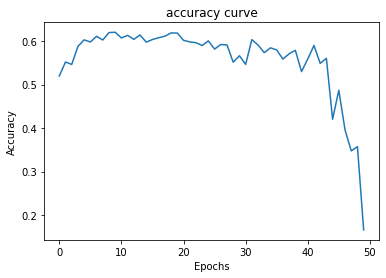

In [ ]:
plt.plot()
plt.plot(range(len(accuracy_list)), accuracy_list)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("accuracy curve")





plt.show()

In [12]:
def train (model, nb_epoch): 
    ###############################################
  #   * Fixer les paramètres de l'entraînement   #
  ###############################################
  model.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

  loss_list = [] # liste qui va contenir la valeur du loss a chaque epoch
  accuracy_list = []
  val_loss_list =[]

  for epoch in range(nb_epoch):  # loop over the dataset multiple times

      running_loss = 0.0
      nb_data = 0.
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data
          
          # zero the parameter gradients
          optimizer.zero_grad()

          inputs, labels = inputs.to(device), labels.to(device)
          

          # forward + backward + optimize
          outputs = model(inputs)              # Forward
          loss = criterion(outputs, labels)
          loss.backward()                    # Backward
          optimizer.step()                   # optimize
  
          # print statistics
          running_loss += loss.item()
          
          nb_data += 1.
          
      running_loss = running_loss / nb_data
      loss_list.append(running_loss)  
      
      correct = 0.
      total = 0.
      val_loss =0.
      
      with torch.no_grad():

          for data in valloader:
              images, labels = data
              images, labels = images.to(device), labels.to(device)
              outputs = model(images)
              loss = criterion(outputs, labels)
              val_loss += loss.item()
              _, predicted = torch.max(outputs.data, 1)
              total += labels.size(0)
              correct += (predicted == labels).sum().item()
      
      accuracy_list.append(correct / total)
      val_loss = val_loss / total
      val_loss_list.append(val_loss)

      
      print("Epoch ", epoch, "; train loss = ", running_loss, "; validation loss = ", val_loss, "; accuracy = ", correct / total) 
      
  torch.save({
                  'nb_epoch': nb_epoch,
                  'model' : net.state_dict(),
                  'listLoss': loss_list,
              }, "modelNN.pth")

  print('Finished Training and save the model as `modelNN.pth`')

  return loss_list, accuracy_list


# Question 2 : Validation set

In [76]:
from torch.utils.data import random_split
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]
)


trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
val_size = len(trainset)*0.2
train_size = len(trainset)-val_size
val_size, train_size = int(val_size), int(train_size)
train_ds, val_ds = random_split(trainset, [train_size, val_size])
len(train_ds), len(val_ds)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(train_ds, batch_size=128, shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(val_ds, batch_size=128, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [77]:

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified


In [78]:

trainloader = torch.utils.data.DataLoader(train_ds, batch_size=16, shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(val_ds, batch_size=16, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=False, num_workers=2)

In [ ]:
###############################################
#   * Fixer les paramètres de l'entraînement   #
###############################################
net = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
nb_epoch = 30 # Le nombre d'epoch
loss_list = [] # liste qui va contenir la valeur du loss a chaque epoch
accuracy_list = []
val_loss_list =[]
for epoch in range(nb_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    nb_data = 0.
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        inputs, labels = inputs.to(device), labels.to(device)
        

        # forward + backward + optimize
        outputs = net(inputs)              # Forward
        loss = criterion(outputs, labels)
        loss.backward()                    # Backward
        optimizer.step()                   # optimize
 
        # print statistics
        running_loss += loss.item()
        
        nb_data += 1.
        
    running_loss = running_loss / nb_data
    loss_list.append(running_loss)  
    
    correct = 0.
    total = 0.
    val_loss =0.
    with torch.no_grad():
        for data in valloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy_list.append(correct / total)
    val_loss = val_loss / total
    val_loss_list.append(val_loss)

    
    print("Epoch ", epoch, "; train loss = ", running_loss, "; validation loss = ", val_loss, "; accuracy = ", correct / total) 
    
torch.save({
                'nb_epoch': nb_epoch,
                'model' : net.state_dict(),
                'listLoss': loss_list,
            }, "modelNN.pth")

print('Finished Training and save the model as `modelNN.pth`')

Epoch  0 ; train loss =  1.659658457326889 ; validation loss =  0.09307165932655334 ; accuracy =  0.4503
Epoch  1 ; train loss =  1.3420039499998093 ; validation loss =  0.0836606860935688 ; accuracy =  0.5307
Epoch  2 ; train loss =  1.2399862669229507 ; validation loss =  0.07770863222777843 ; accuracy =  0.5643
Epoch  3 ; train loss =  1.1596863475680352 ; validation loss =  0.07877946285009384 ; accuracy =  0.5655
Epoch  4 ; train loss =  1.1014045039892197 ; validation loss =  0.07477419158816337 ; accuracy =  0.5885
Epoch  5 ; train loss =  1.0718161629199983 ; validation loss =  0.07872342518866063 ; accuracy =  0.5788
Epoch  6 ; train loss =  1.0461265175580978 ; validation loss =  0.07616299569010734 ; accuracy =  0.5931
Epoch  7 ; train loss =  1.0157303484678268 ; validation loss =  0.07601223241984845 ; accuracy =  0.6024
Epoch  8 ; train loss =  1.0129699659854174 ; validation loss =  0.08533803769946098 ; accuracy =  0.5539
Epoch  9 ; train loss =  0.9974765964329243 ; va

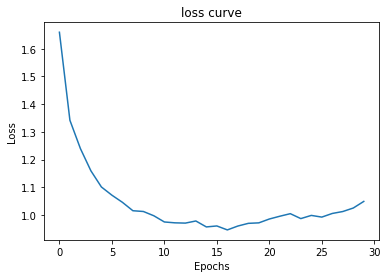

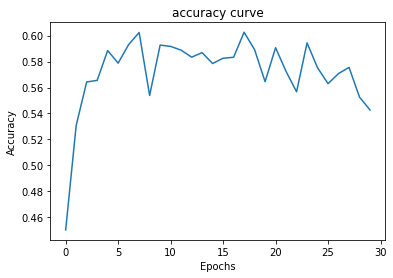

In [ ]:
plt.plot()
plt.plot(range(len(loss_list)), loss_list)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("loss curve")
plt.show()
plt.plot()
plt.plot(range(len(accuracy_list)), accuracy_list)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("accuracy curve")





plt.show()

In [ ]:
net = Net()
loss_list, accuracy_list = train(net,50)

Epoch  0 ; train loss =  1.6549233624458313 ; validation loss =  0.09410720539093018 ; accuracy =  0.4512
Epoch  1 ; train loss =  1.3354924739718437 ; validation loss =  0.07959400721788407 ; accuracy =  0.5465
Epoch  2 ; train loss =  1.2223804468870163 ; validation loss =  0.07520846311450005 ; accuracy =  0.5756
Epoch  3 ; train loss =  1.145960095369816 ; validation loss =  0.07561727332770825 ; accuracy =  0.5847
Epoch  4 ; train loss =  1.0953942058980466 ; validation loss =  0.07916202778816223 ; accuracy =  0.5765
Epoch  5 ; train loss =  1.0558585896015167 ; validation loss =  0.07317337313890457 ; accuracy =  0.6074
Epoch  6 ; train loss =  1.036561862820387 ; validation loss =  0.08032138778567315 ; accuracy =  0.5693
Epoch  7 ; train loss =  1.0107864398956299 ; validation loss =  0.0772602109491825 ; accuracy =  0.5945
Epoch  8 ; train loss =  0.991444204902649 ; validation loss =  0.07817509678304195 ; accuracy =  0.6033
Epoch  9 ; train loss =  0.9795844942927361 ; vali

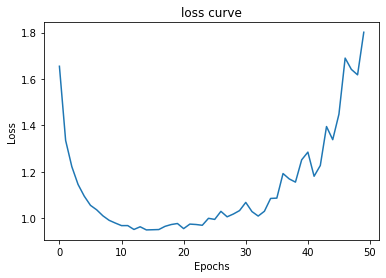

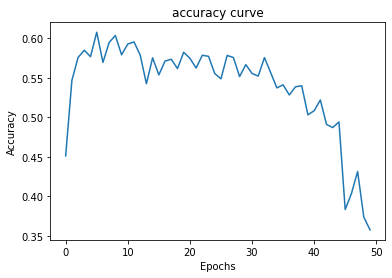

In [ ]:
plt.plot()
plt.plot(range(len(loss_list)), loss_list)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("loss curve")
plt.show()
plt.plot()
plt.plot(range(len(accuracy_list)), accuracy_list)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("accuracy curve")





plt.show()

# Question 3 : Modifier l'architecture

Réduire les channels de sortie

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)
 

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16* 5 * 5) #flattening
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net().to(device)
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
loss_list, accuracy_list = train(net,30)

Epoch  0 ; train loss =  1.7403290841817856 ; validation loss =  0.09303789148330688 ; accuracy =  0.45
Epoch  1 ; train loss =  1.4355946624279021 ; validation loss =  0.08705936259031295 ; accuracy =  0.5077
Epoch  2 ; train loss =  1.32657785820961 ; validation loss =  0.08578483852744102 ; accuracy =  0.5155
Epoch  3 ; train loss =  1.263974298632145 ; validation loss =  0.07988522159457206 ; accuracy =  0.5519
Epoch  4 ; train loss =  1.2189047217607498 ; validation loss =  0.08308840578198433 ; accuracy =  0.5274
Epoch  5 ; train loss =  1.198276206243038 ; validation loss =  0.08156694927811622 ; accuracy =  0.5456
Epoch  6 ; train loss =  1.163602741611004 ; validation loss =  0.08002764807343483 ; accuracy =  0.5612
Epoch  7 ; train loss =  1.1467302218735218 ; validation loss =  0.08314349300265313 ; accuracy =  0.5431
Epoch  8 ; train loss =  1.1320934749245644 ; validation loss =  0.08405619871914387 ; accuracy =  0.5489
Epoch  9 ; train loss =  1.1191038930177688 ; validat

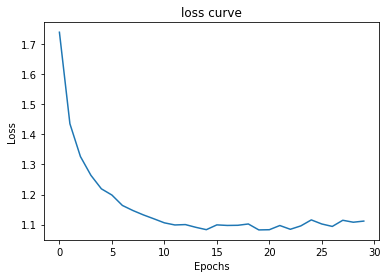

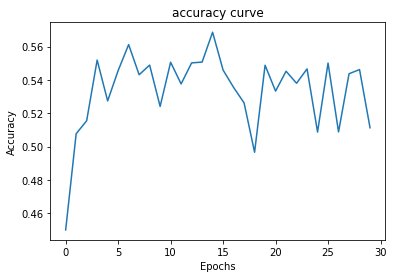

In [ ]:
plt.plot()
plt.plot(range(len(loss_list)), loss_list)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("loss curve")
plt.show()
plt.plot()
plt.plot(range(len(accuracy_list)), accuracy_list)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("accuracy curve")





plt.show()

Augementer les channels de sortie

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5)
        self.fc1 = nn.Linear(in_features=64 * 5* 5, out_features=124)
        self.fc2 = nn.Linear(in_features=124, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)
 

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64* 5* 5) #flattening
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net().to(device)
print(net)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=124, bias=True)
  (fc2): Linear(in_features=124, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
loss_list, accuracy_list = train(net,30)

Epoch  0 ; train loss =  1.5769049356222153 ; validation loss =  0.0844665390074253 ; accuracy =  0.5313
Epoch  1 ; train loss =  1.1856524205207826 ; validation loss =  0.07000334449112415 ; accuracy =  0.6224
Epoch  2 ; train loss =  1.0103362520754338 ; validation loss =  0.06523874956071377 ; accuracy =  0.651
Epoch  3 ; train loss =  0.9033853489518165 ; validation loss =  0.0664349333524704 ; accuracy =  0.6402
Epoch  4 ; train loss =  0.8200588400214911 ; validation loss =  0.0695653815805912 ; accuracy =  0.634
Epoch  5 ; train loss =  0.7503459255933762 ; validation loss =  0.0712862347766757 ; accuracy =  0.648
Epoch  6 ; train loss =  0.6993543348729611 ; validation loss =  0.07285365104973317 ; accuracy =  0.6358
Epoch  7 ; train loss =  0.6752359586328268 ; validation loss =  0.06654588260799646 ; accuracy =  0.681
Epoch  8 ; train loss =  0.6296810042411088 ; validation loss =  0.07175629642605781 ; accuracy =  0.6577
Epoch  9 ; train loss =  0.6267497913479805 ; validati

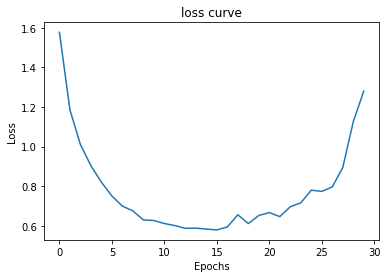

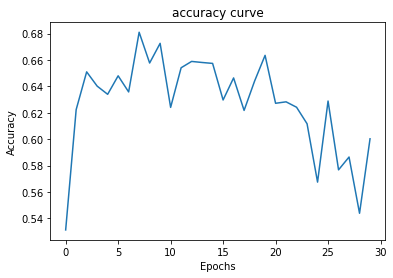

In [ ]:
plt.plot()
plt.plot(range(len(loss_list)), loss_list)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("loss curve")
plt.show()
plt.plot()
plt.plot(range(len(accuracy_list)), accuracy_list)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("accuracy curve")





plt.show()

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # fully connected layers
        self.fc1 = nn.Linear(64 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 10)
      
       

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # flattening
        x = x.view(-1, 64 * 4 * 4)
        # fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net().to(device)

In [13]:
loss_list, accuracy_list = train(net,30)

Epoch  0 ; train loss =  1.7990007009029387 ; validation loss =  0.09382645153999329 ; accuracy =  0.443
Epoch  1 ; train loss =  1.4769871032953263 ; validation loss =  0.08960137089490891 ; accuracy =  0.4913
Epoch  2 ; train loss =  1.377484283053875 ; validation loss =  0.08679784283638001 ; accuracy =  0.5019
Epoch  3 ; train loss =  1.3176422429084778 ; validation loss =  0.07987519445419311 ; accuracy =  0.5385
Epoch  4 ; train loss =  1.2818713999986648 ; validation loss =  0.07965510421395301 ; accuracy =  0.5447
Epoch  5 ; train loss =  1.2592230283617973 ; validation loss =  0.07576678109169006 ; accuracy =  0.5726
Epoch  6 ; train loss =  1.2459989675641059 ; validation loss =  0.079014996483922 ; accuracy =  0.5582
Epoch  7 ; train loss =  1.2365328162908553 ; validation loss =  0.08046353315114975 ; accuracy =  0.5533
Epoch  8 ; train loss =  1.2386301866054534 ; validation loss =  0.07860505639314652 ; accuracy =  0.5703
Epoch  9 ; train loss =  1.2372239280819892 ; vali

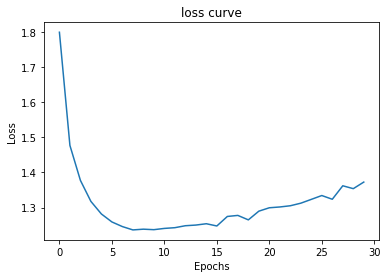

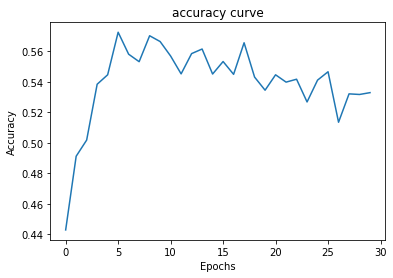

In [14]:
plt.plot()
plt.plot(range(len(loss_list)), loss_list)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("loss curve")
plt.show()
plt.plot()
plt.plot(range(len(accuracy_list)), accuracy_list)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("accuracy curve")





plt.show()

In [15]:

class CNN(nn.Module):
   

    def __init__(self):
        
        super(CNN, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
        
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
           
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
           

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
          
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
       
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
         
            nn.Linear(512, 10)
        )


    def forward(self, x):
        """Perform forward."""
        
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x

net = CNN().to(device)

In [16]:
loss_list, accuracy_list = train(net,30)

Epoch  0 ; train loss =  2.046619375658035 ; validation loss =  0.10821501604318619 ; accuracy =  0.3456
Epoch  1 ; train loss =  1.6022355233430863 ; validation loss =  0.09102635062932968 ; accuracy =  0.463
Epoch  2 ; train loss =  1.3807750124931335 ; validation loss =  0.08146131969094277 ; accuracy =  0.5155
Epoch  3 ; train loss =  1.2272798910975455 ; validation loss =  0.07759213982522488 ; accuracy =  0.5674
Epoch  4 ; train loss =  1.1106652571558953 ; validation loss =  0.06907876493930816 ; accuracy =  0.6146
Epoch  5 ; train loss =  1.0288891564488412 ; validation loss =  0.06353167225718498 ; accuracy =  0.6444
Epoch  6 ; train loss =  0.9720838968038559 ; validation loss =  0.062151546451449394 ; accuracy =  0.6492
Epoch  7 ; train loss =  0.9259506151497364 ; validation loss =  0.06372717814445496 ; accuracy =  0.6375
Epoch  8 ; train loss =  0.8996070716798306 ; validation loss =  0.05841821358501911 ; accuracy =  0.6745
Epoch  9 ; train loss =  0.8715661446750164 ; v

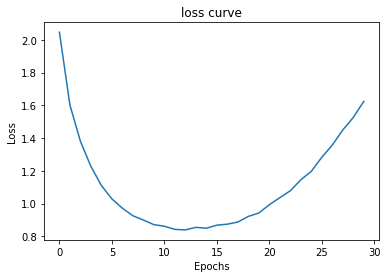

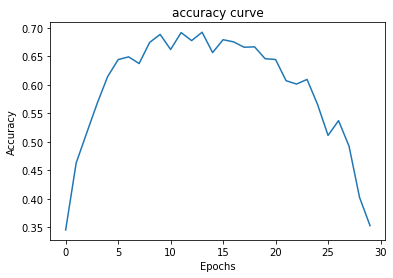

In [17]:
plt.plot()
plt.plot(range(len(loss_list)), loss_list)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("loss curve")
plt.show()
plt.plot()
plt.plot(range(len(accuracy_list)), accuracy_list)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("accuracy curve")





plt.show()

# Question 4 : sortie des filtres

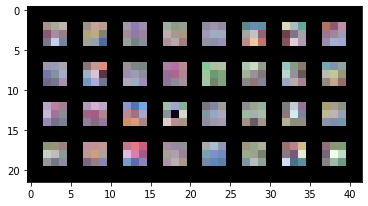

In [ ]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
kernels = net.conv_layer[0].weight.detach().clone()
kernels = kernels.cpu()
kernels = kernels - kernels.min()
kernels = kernels / kernels.max()
img = make_grid(kernels)
plt.imshow(img.permute(1, 2, 0))

# Question 5 : SqueezeNet

In [19]:
from __future__ import print_function
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  1.10.0+cu111
Torchvision Version:  0.11.1+cu111


In [87]:
def train_finetune(model, nb_epoch):
  ###############################################
  #   * Fixer les paramètres de l'entraînement   #
      ###############################################
  model.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
  nb_epoch = 30 # Le nombre d'epoch
  loss_list = [] # liste qui va contenir la valeur du loss a chaque epoch
  accuracy_list = []
  val_loss_list =[]

  for epoch in range(nb_epoch):  # loop over the dataset multiple times

      running_loss = 0.0
      nb_data = 0.
      model.train()
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data
          
          # zero the parameter gradients
          optimizer.zero_grad()

          inputs, labels = inputs.to(device), labels.to(device)
         

          # forward + backward + optimize
          outputs = model(inputs)              # Forward
 
      
          loss = criterion(outputs, labels)
          loss.backward()                    # Backward
         # torch.autograd.set_detect_anomaly(False)
          optimizer.step()                   # optimize
  
          # print statistics
          running_loss += loss.item()
          
          nb_data += 1.
          
      running_loss = running_loss / nb_data
      loss_list.append(running_loss)  
      
      correct = 0.
      total = 0.
      val_loss =0.
      model.eval()
      with torch.no_grad():

          for data in valloader:
              images, labels = data
              images, labels = images.to(device), labels.to(device)
              outputs = model(images)
              loss = criterion(outputs, labels)
              val_loss += loss.item()
              _, predicted = torch.max(outputs.data, 1)
              total += labels.size(0)
              correct += (predicted == labels).sum().item()
      
      accuracy_list.append(correct / total)
      val_loss = val_loss / total
      val_loss_list.append(val_loss)

      
      print("Epoch ", epoch, "; train loss = ", running_loss, "; validation loss = ", val_loss, "; accuracy = ", correct / total) 
      
  torch.save({
                  'nb_epoch': nb_epoch,
                  'model' : net.state_dict(),
                  'listLoss': loss_list,
              }, "modelNN.pth")

  print('Finished Training and save the model as `modelNN.pth`')

  return loss_list, accuracy_list


In [85]:
squeeze = models.squeezenet1_1(pretrained=True)

In [86]:
###############################################
#   * Fixer les paramètres de l'entraînement   #
###############################################
squeeze.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(squeeze.parameters(), lr=1e-8, momentum=0.9)
nb_epoch = 100 # Le nombre d'epoch
loss_list = [] # liste qui va contenir la valeur du loss a chaque epoch
accuracy_list = []
val_loss_list =[]

for epoch in range(nb_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    nb_data = 0.
    squeeze.train()
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        inputs, labels = inputs.to(device), labels.to(device)
        

        # forward + backward + optimize
        outputs = squeeze(inputs)              # Forward
        loss = criterion(outputs, labels)
        loss.backward()                    # Backward
        optimizer.step()                   # optimize
 
        # print statistics
        running_loss += loss.item()
        
        nb_data += 1.
        
    running_loss = running_loss / nb_data
    loss_list.append(running_loss)  
    
    correct = 0.
    total = 0.
    val_loss =0.
    squeeze.eval()
    with torch.no_grad():

        for data in valloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = squeeze(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy_list.append(correct / total)
    val_loss = val_loss / total
    val_loss_list.append(val_loss)

    
    print("Epoch ", epoch, "; train loss = ", running_loss, "; validation loss = ", val_loss, "; accuracy = ", correct / total) 
    
torch.save({
                'nb_epoch': nb_epoch,
                'model' : net.state_dict(),
                'listLoss': loss_list,
            }, "modelNN.pth")

print('Finished Training and save the model as `modelNN.pth`')

Epoch  0 ; train loss =  41.6706420135498 ; validation loss =  1.443281099319458 ; accuracy =  0.001
Epoch  1 ; train loss =  22.476581478118895 ; validation loss =  0.902419391155243 ; accuracy =  0.0019
Epoch  2 ; train loss =  15.263115240097045 ; validation loss =  0.6803659096717835 ; accuracy =  0.003
Epoch  3 ; train loss =  11.946184007835388 ; validation loss =  0.5673571403980255 ; accuracy =  0.0033
Epoch  4 ; train loss =  10.093877913475037 ; validation loss =  0.50001408162117 ; accuracy =  0.005
Epoch  5 ; train loss =  8.974625930404663 ; validation loss =  0.45572707648277283 ; accuracy =  0.0074
Epoch  6 ; train loss =  8.214748962974548 ; validation loss =  0.42503798604011533 ; accuracy =  0.0108
Epoch  7 ; train loss =  7.689945794296265 ; validation loss =  0.40307342958450315 ; accuracy =  0.0136
Epoch  8 ; train loss =  7.3379788444519045 ; validation loss =  0.38683146305084226 ; accuracy =  0.0192
Epoch  9 ; train loss =  7.08149994430542 ; validation loss =  

In [91]:

nb_epoch = 100 # Le nombre d'epoch

for epoch in range(nb_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    nb_data = 0.
    squeeze.train()
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        inputs, labels = inputs.to(device), labels.to(device)
        

        # forward + backward + optimize
        outputs = squeeze(inputs)              # Forward
        loss = criterion(outputs, labels)
        loss.backward()                    # Backward
        optimizer.step()                   # optimize
 
        # print statistics
        running_loss += loss.item()
        
        nb_data += 1.
        
    running_loss = running_loss / nb_data
    loss_list.append(running_loss)  
    
    correct = 0.
    total = 0.
    val_loss =0.
    squeeze.eval()
    with torch.no_grad():

        for data in valloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = squeeze(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy_list.append(correct / total)
    val_loss = val_loss / total
    val_loss_list.append(val_loss)

    
    print("Epoch ", epoch, "; train loss = ", running_loss, "; validation loss = ", val_loss, "; accuracy = ", correct / total) 
    
torch.save({
                'nb_epoch': nb_epoch,
                'model' : net.state_dict(),
                'listLoss': loss_list,
            }, "modelNN.pth")

print('Finished Training and save the model as `modelNN.pth`')

Epoch  0 ; train loss =  4.448615445232392 ; validation loss =  0.18687267735004426 ; accuracy =  0.1601
Epoch  1 ; train loss =  4.424002187347412 ; validation loss =  0.1858194338321686 ; accuracy =  0.1593
Epoch  2 ; train loss =  4.42813560962677 ; validation loss =  0.18472351191043854 ; accuracy =  0.1588
Epoch  3 ; train loss =  4.410881905937194 ; validation loss =  0.18365219218730927 ; accuracy =  0.1592
Epoch  4 ; train loss =  4.373496229171753 ; validation loss =  0.1825789296388626 ; accuracy =  0.1595
Epoch  5 ; train loss =  4.3687778020858765 ; validation loss =  0.1815479915380478 ; accuracy =  0.1599
Epoch  6 ; train loss =  4.367068275260925 ; validation loss =  0.18048614203929902 ; accuracy =  0.1594
Epoch  7 ; train loss =  4.360101202106476 ; validation loss =  0.17946554005146026 ; accuracy =  0.1581
Epoch  8 ; train loss =  4.336679583835601 ; validation loss =  0.17838987295627595 ; accuracy =  0.1584
Epoch  9 ; train loss =  4.328995828533173 ; validation lo

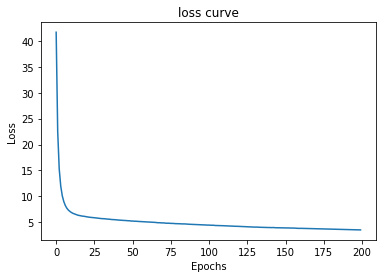

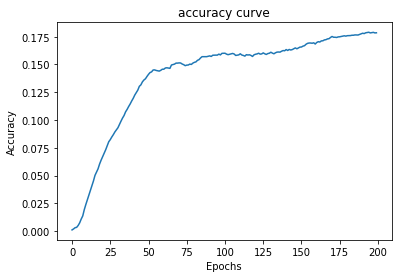

In [92]:
plt.plot()
plt.plot(range(len(loss_list)), loss_list)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("loss curve")
plt.show()
plt.plot()
plt.plot(range(len(accuracy_list)), accuracy_list)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("accuracy curve")





plt.show()

# BONUS : Results improvments

---



## Data augmentation

In [36]:
from torch.utils.data import random_split
transform = transforms.Compose(
    [
     
     transforms.RandomHorizontalFlip(),
     transforms.RandomVerticalFlip(),
     transforms.RandomRotation(15),
     
     transforms.ToTensor(),
     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]
)


trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
val_size = len(trainset)*0.2
train_size = len(trainset)-val_size
val_size, train_size = int(val_size), int(train_size)
train_ds, val_ds = random_split(trainset, [train_size, val_size])
len(train_ds), len(val_ds)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(train_ds, batch_size=128, shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(val_ds, batch_size=128, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [56]:

class CNN(nn.Module):
   

    def __init__(self):
        
        super(CNN, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
           
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
          
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
           
            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
     
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
    
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
    
            nn.Linear(512, 10)
        )


    def forward(self, x):
        """Perform forward."""
        
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x

net = CNN().to(device)

In [37]:
def train (model, nb_epoch): 
    ###############################################
  #   * Fixer les paramètres de l'entraînement   #
  ###############################################
  model.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

  loss_list = [] # liste qui va contenir la valeur du loss a chaque epoch
  accuracy_list = []
  val_loss_list =[]

  for epoch in range(nb_epoch):  # loop over the dataset multiple times

      running_loss = 0.0
      nb_data = 0.
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data
          
          # zero the parameter gradients
          optimizer.zero_grad()

          inputs, labels = inputs.to(device), labels.to(device)
          

          # forward + backward + optimize
          outputs = model(inputs)              # Forward
          loss = criterion(outputs, labels)
          loss.backward()                    # Backward
          optimizer.step()                   # optimize
  
          # print statistics
          running_loss += loss.item()
          
          nb_data += 1.
          
      running_loss = running_loss / nb_data
      loss_list.append(running_loss)  
      
      correct = 0.
      total = 0.
      val_loss =0.
      
      with torch.no_grad():

          for data in valloader:
              images, labels = data
              images, labels = images.to(device), labels.to(device)
              outputs = model(images)
              loss = criterion(outputs, labels)
              val_loss += loss.item()
              _, predicted = torch.max(outputs.data, 1)
              total += labels.size(0)
              correct += (predicted == labels).sum().item()
      
      accuracy_list.append(correct / total)
      val_loss = val_loss / total
      val_loss_list.append(val_loss)

      
      print("Epoch ", epoch, "; train loss = ", running_loss, "; validation loss = ", val_loss, "; accuracy = ", correct / total) 
      
  torch.save({
                  'nb_epoch': nb_epoch,
                  'model' : net.state_dict(),
                  'listLoss': loss_list,
              }, "modelNN.pth")

  print('Finished Training and save the model as `modelNN.pth`')

  return loss_list, accuracy_list


In [25]:
net = CNN().to(device)
loss_list, accuracy_list = train(net,30)

Epoch  0 ; train loss =  1.9943201339244843 ; validation loss =  0.10892382736206055 ; accuracy =  0.3425
Epoch  1 ; train loss =  1.5557323548316955 ; validation loss =  0.0889592785358429 ; accuracy =  0.4752
Epoch  2 ; train loss =  1.3424258199214936 ; validation loss =  0.08155406789779664 ; accuracy =  0.5284
Epoch  3 ; train loss =  1.1834657971143723 ; validation loss =  0.07345095405578614 ; accuracy =  0.5831
Epoch  4 ; train loss =  1.071043485212326 ; validation loss =  0.06603082111477852 ; accuracy =  0.6249
Epoch  5 ; train loss =  0.991503942322731 ; validation loss =  0.060745016032457355 ; accuracy =  0.6515
Epoch  6 ; train loss =  0.9330955223679542 ; validation loss =  0.06216330821812153 ; accuracy =  0.657
Epoch  7 ; train loss =  0.8870572229206563 ; validation loss =  0.05661101016998291 ; accuracy =  0.6845
Epoch  8 ; train loss =  0.8575854267418385 ; validation loss =  0.053531671154499055 ; accuracy =  0.7076
Epoch  9 ; train loss =  0.8421673277705908 ; va

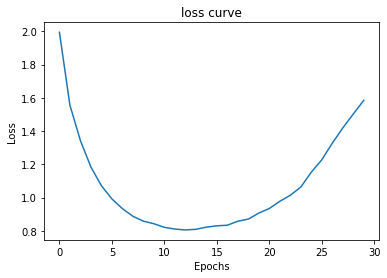

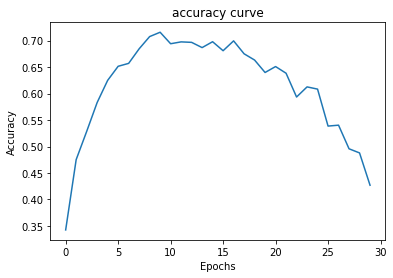

In [26]:
plt.plot()
plt.plot(range(len(loss_list)), loss_list)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("loss curve")
plt.show()
plt.plot()
plt.plot(range(len(accuracy_list)), accuracy_list)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("accuracy curve")





plt.show()

## Optimizer


### 30 epochs

In [39]:
import torch.optim.lr_scheduler



In [40]:
net = CNN().to(device)


In [41]:
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)

In [42]:
lr_sched = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

In [44]:
def train (model, nb_epoch, optimizer): 
    ###############################################
  #   * Fixer les paramètres de l'entraînement   #
  ###############################################
  model.to(device)
  criterion = nn.CrossEntropyLoss()
  

  loss_list = [] # liste qui va contenir la valeur du loss a chaque epoch
  accuracy_list = []
  val_loss_list =[]

  for epoch in range(nb_epoch):  # loop over the dataset multiple times

      running_loss = 0.0
      nb_data = 0.
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data
          
          # zero the parameter gradients
          optimizer.zero_grad()

          inputs, labels = inputs.to(device), labels.to(device)
          

          # forward + backward + optimize
          outputs = model(inputs)              # Forward
          loss = criterion(outputs, labels)
          loss.backward()                    # Backward
          optimizer.step()                   # optimize
  
          # print statistics
          running_loss += loss.item()
          
          nb_data += 1.
      
      
          
      running_loss = running_loss / nb_data
      loss_list.append(running_loss)  
      
      correct = 0.
      total = 0.
      val_loss =0.
      
      with torch.no_grad():

          for data in valloader:
              images, labels = data
              images, labels = images.to(device), labels.to(device)
              outputs = model(images)
              loss = criterion(outputs, labels)
              val_loss += loss.item()
              _, predicted = torch.max(outputs.data, 1)
              total += labels.size(0)
              correct += (predicted == labels).sum().item()
      
      accuracy_list.append(correct / total)
      val_loss = val_loss / total
      val_loss_list.append(val_loss)
      lr_sched.step()

      

      
      print("Epoch ", epoch, "; train loss = ", running_loss, "; validation loss = ", val_loss, "; accuracy = ", correct / total) 
      
  torch.save({
                  'nb_epoch': nb_epoch,
                  'model' : net.state_dict(),
                  'listLoss': loss_list,
              }, "modelNN.pth")

  print('Finished Training and save the model as `modelNN.pth`')

  return loss_list, accuracy_list


In [45]:

loss_list, accuracy_list = train (net,30, optimizer)

Epoch  0 ; train loss =  2.160063032525035 ; validation loss =  0.016151675951480867 ; accuracy =  0.2431
Epoch  1 ; train loss =  1.769780830453379 ; validation loss =  0.012694448053836823 ; accuracy =  0.4043
Epoch  2 ; train loss =  1.5531840583386893 ; validation loss =  0.011688576638698578 ; accuracy =  0.4537
Epoch  3 ; train loss =  1.3971326549213154 ; validation loss =  0.010905896389484405 ; accuracy =  0.4983
Epoch  4 ; train loss =  1.2846674574449801 ; validation loss =  0.010155228316783905 ; accuracy =  0.5387
Epoch  5 ; train loss =  1.176991121456646 ; validation loss =  0.009403755170106888 ; accuracy =  0.5664
Epoch  6 ; train loss =  1.1138113064887805 ; validation loss =  0.008613062393665313 ; accuracy =  0.6117
Epoch  7 ; train loss =  1.04722609630408 ; validation loss =  0.008349341994524003 ; accuracy =  0.6291
Epoch  8 ; train loss =  0.9941221660318466 ; validation loss =  0.008122396087646484 ; accuracy =  0.6409
Epoch  9 ; train loss =  0.948389844010813

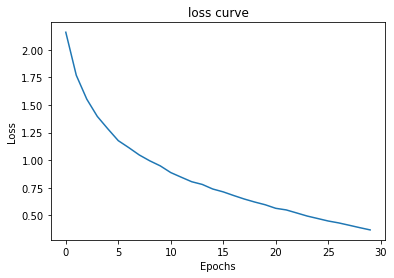

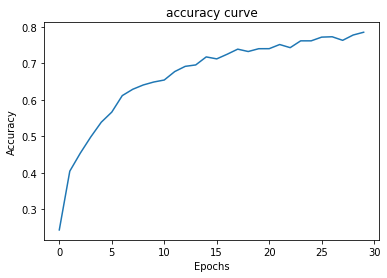

In [46]:
plt.plot()
plt.plot(range(len(loss_list)), loss_list)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("loss curve")
plt.show()
plt.plot()
plt.plot(range(len(accuracy_list)), accuracy_list)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("accuracy curve")





plt.show()

### 50 epochs

In [57]:
net = CNN().to(device)
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
lr_sched = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

In [58]:

loss_list, accuracy_list = train (net,50, optimizer)

Epoch  0 ; train loss =  2.293025981123074 ; validation loss =  0.01823707525730133 ; accuracy =  0.1031
Epoch  1 ; train loss =  2.3044800537462815 ; validation loss =  0.018195440888404846 ; accuracy =  0.0986
Epoch  2 ; train loss =  2.3027750988737843 ; validation loss =  0.01820379259586334 ; accuracy =  0.1002
Epoch  3 ; train loss =  2.2998708612240923 ; validation loss =  0.018370568227767944 ; accuracy =  0.1632
Epoch  4 ; train loss =  2.0481394761667464 ; validation loss =  0.014913958132266997 ; accuracy =  0.2943
Epoch  5 ; train loss =  1.700365558980753 ; validation loss =  0.013267987167835235 ; accuracy =  0.3877
Epoch  6 ; train loss =  1.5078083947062872 ; validation loss =  0.011071419286727906 ; accuracy =  0.4902
Epoch  7 ; train loss =  1.3913114672651687 ; validation loss =  0.010641502904891968 ; accuracy =  0.5042
Epoch  8 ; train loss =  1.257682973584428 ; validation loss =  0.009259069061279298 ; accuracy =  0.578
Epoch  9 ; train loss =  1.1720798960128151

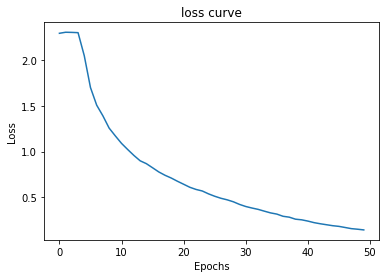

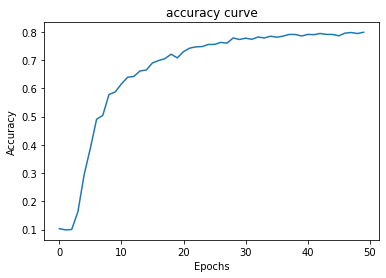

In [59]:
plt.plot()
plt.plot(range(len(loss_list)), loss_list)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("loss curve")
plt.show()
plt.plot()
plt.plot(range(len(accuracy_list)), accuracy_list)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("accuracy curve")





plt.show()

## Dropout

In [60]:

class CNN(nn.Module):
   

    def __init__(self):
        
        super(CNN, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
       
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),

            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),

            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )


    def forward(self, x):
        """Perform forward."""
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x

In [61]:
net = CNN().to(device)
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
lr_sched = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

In [62]:

loss_list, accuracy_list = train (net,50, optimizer)

Epoch  0 ; train loss =  2.0978961124206883 ; validation loss =  0.015345198023319245 ; accuracy =  0.2735
Epoch  1 ; train loss =  1.7531562620839372 ; validation loss =  0.013394860458374024 ; accuracy =  0.3779
Epoch  2 ; train loss =  1.5303960044543965 ; validation loss =  0.01126498898267746 ; accuracy =  0.4709
Epoch  3 ; train loss =  1.392270677005902 ; validation loss =  0.01104050236940384 ; accuracy =  0.4941
Epoch  4 ; train loss =  1.2798941318219461 ; validation loss =  0.00993432331085205 ; accuracy =  0.5503
Epoch  5 ; train loss =  1.1802610446469852 ; validation loss =  0.009649591469764709 ; accuracy =  0.5605
Epoch  6 ; train loss =  1.10629950925565 ; validation loss =  0.009076762217283249 ; accuracy =  0.598
Epoch  7 ; train loss =  1.0319719164135357 ; validation loss =  0.008624057739973068 ; accuracy =  0.6199
Epoch  8 ; train loss =  0.9733938498618885 ; validation loss =  0.008181653589010239 ; accuracy =  0.6369
Epoch  9 ; train loss =  0.9294398048053534 

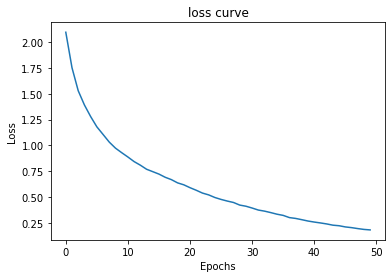

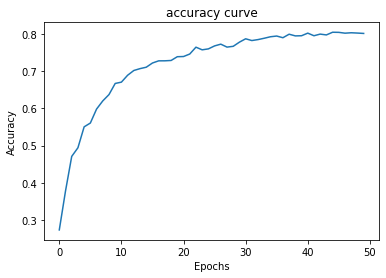

In [63]:
plt.plot()
plt.plot(range(len(loss_list)), loss_list)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("loss curve")
plt.show()
plt.plot()
plt.plot(range(len(accuracy_list)), accuracy_list)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("accuracy curve")





plt.show()

## Batch normalization

In [64]:
class CNN(nn.Module):
   

    def __init__(self):
        
        super(CNN, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )


    def forward(self, x):
        """Perform forward."""
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x

In [65]:
net = CNN().to(device)
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
lr_sched = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

In [66]:

loss_list, accuracy_list = train (net,50, optimizer)

Epoch  0 ; train loss =  1.8126367201058629 ; validation loss =  0.013401284277439118 ; accuracy =  0.4008
Epoch  1 ; train loss =  1.5112270912804162 ; validation loss =  0.011264520013332367 ; accuracy =  0.4805
Epoch  2 ; train loss =  1.32567853363939 ; validation loss =  0.010823408871889114 ; accuracy =  0.5091
Epoch  3 ; train loss =  1.188326049726992 ; validation loss =  0.008883754211664199 ; accuracy =  0.5994
Epoch  4 ; train loss =  1.0772943753784838 ; validation loss =  0.008651022392511368 ; accuracy =  0.614
Epoch  5 ; train loss =  0.9814492704007572 ; validation loss =  0.007961132490634917 ; accuracy =  0.6494
Epoch  6 ; train loss =  0.9154623769723569 ; validation loss =  0.007371796798706054 ; accuracy =  0.6674
Epoch  7 ; train loss =  0.8545402537900418 ; validation loss =  0.007238350331783295 ; accuracy =  0.6833
Epoch  8 ; train loss =  0.7983686556450476 ; validation loss =  0.0068019107401371005 ; accuracy =  0.6961
Epoch  9 ; train loss =  0.7491371039384

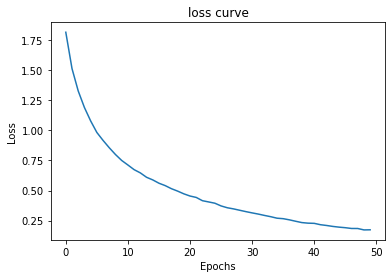

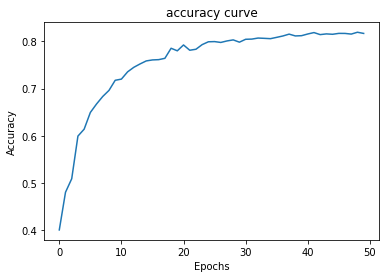

In [67]:
plt.plot()
plt.plot(range(len(loss_list)), loss_list)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("loss curve")
plt.show()
plt.plot()
plt.plot(range(len(accuracy_list)), accuracy_list)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("accuracy curve")





plt.show()

# BONUS : ResNet50

In [ ]:
resnet = models.resnet50(pretrained=True)


In [ ]:
loss_list, accuracy_list = train_finetune(resnet,30)


Epoch  0 ; train loss =  0.928453075915575 ; validation loss =  0.05386527907550335 ; accuracy =  0.715
Epoch  1 ; train loss =  0.6842121284425259 ; validation loss =  0.043762910722196104 ; accuracy =  0.7922
Epoch  2 ; train loss =  0.47533747600913046 ; validation loss =  0.04152848421707749 ; accuracy =  0.799
Epoch  3 ; train loss =  0.35661333066523077 ; validation loss =  0.03489414740838111 ; accuracy =  0.8161
Epoch  4 ; train loss =  0.2518428439222276 ; validation loss =  0.04200234291553497 ; accuracy =  0.8127
Epoch  5 ; train loss =  0.19200321594458072 ; validation loss =  0.035731744547188284 ; accuracy =  0.8306
Epoch  6 ; train loss =  0.15675224102041685 ; validation loss =  0.03690798887065612 ; accuracy =  0.8309
Epoch  7 ; train loss =  0.12905469895871355 ; validation loss =  0.05723357162903994 ; accuracy =  0.8064
Epoch  8 ; train loss =  0.11824885369255207 ; validation loss =  0.04406602121721953 ; accuracy =  0.8177
Epoch  9 ; train loss =  0.30282543528487

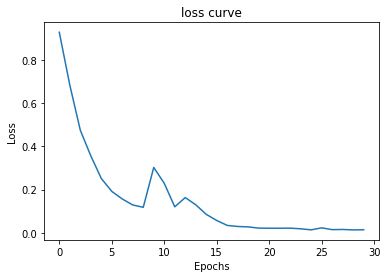

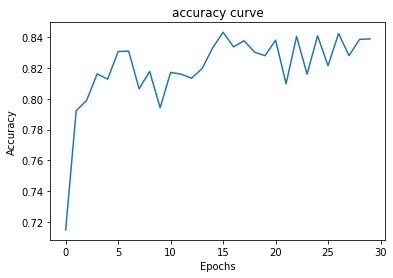

In [ ]:
plt.plot()
plt.plot(range(len(loss_list)), loss_list)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("loss curve")
plt.show()
plt.plot()
plt.plot(range(len(accuracy_list)), accuracy_list)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("accuracy curve")





plt.show()